#Fire up graphlab create

In [7]:
import graphlab

#Load some house sales data

Dataset is from house sales in King County, the region where the city of Seattle, WA is located.

In [8]:
sales = graphlab.SFrame('home_data.gl/')

[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: C:\Users\ALHAMD~1\AppData\Local\Temp\graphlab_server_1514631275.log.0


This non-commercial license of GraphLab Create for academic use is assigned to rohailkhan@gmail.com and will expire on December 27, 2018.


#Exploring the data for housing sales 

The house price is correlated with the number of square feet of living space.

In [10]:
graphlab.canvas.set_target('ipynb')
sales.show(view="Scatter Plot", x="sqft_living", y="price")

#Create a simple regression model of sqft_living to price

Split data into training and testing.  
We use seed=0 so that everyone running this notebook gets the same results.  In practice, you may set a random seed (or let GraphLab Create pick a random seed for you).  

In [11]:
train_data,test_data = sales.random_split(.8,seed=0)

##Build the regression model using only sqft_living as a feature

In [12]:
sqft_model = graphlab.linear_regression.create(train_data, target='price', features=['sqft_living'],validation_set=None)

Linear regression:

--------------------------------------------------------

Number of examples          : 17384

Number of features          : 1

Number of unpacked features : 1

Number of coefficients    : 2

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |

+-----------+----------+--------------+--------------------+---------------+

| 1         | 2        | 1.014058     | 4349521.926170     | 262943.613754 |

+-----------+----------+--------------+--------------------+---------------+

SUCCESS: Optimal solution found.

#Evaluate the simple model

In [ ]:
print test_data['price'].mean()

In [ ]:
print sqft_model.evaluate(test_data)

RMSE of about \$255,170!

#Let's show what our predictions look like

Matplotlib is a Python plotting library that is also useful for plotting.  You can install it with:

'pip install matplotlib'

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

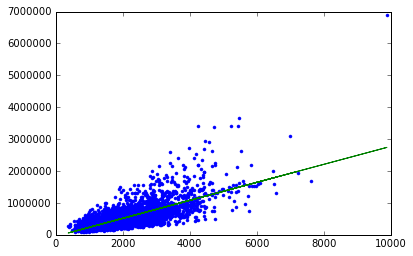

In [14]:
plt.plot(test_data['sqft_living'],test_data['price'],'.',
        test_data['sqft_living'],sqft_model.predict(test_data),'-')

Above:  blue dots are original data, green line is the prediction from the simple regression.

Below: we can view the learned regression coefficients. 

In [ ]:
sqft_model.get('coefficients')

#Explore other features in the data

To build a more elaborate model, we will explore using more features.

In [35]:
my_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']

In [ ]:
sales[my_features].show()

In [ ]:
sales.show(view='BoxWhisker Plot', x='zipcode', y='price')

Pull the bar at the bottom to view more of the data.  

98039 is the most expensive zip code.

#Build a regression model with more features

In [36]:
my_features_model = graphlab.linear_regression.create(train_data,target='price',features=my_features,validation_set=None)

Linear regression:

--------------------------------------------------------

Number of examples          : 17384

Number of features          : 6

Number of unpacked features : 6

Number of coefficients    : 115

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |

+-----------+----------+--------------+--------------------+---------------+

| 1         | 2        | 0.035002     | 3763208.270523     | 181908.848367 |

+-----------+----------+--------------+--------------------+---------------+

SUCCESS: Optimal solution found.

In [16]:
print my_features

NameError: name 'my_features' is not defined

##Comparing the results of the simple model with adding more features

In [ ]:
print sqft_model.evaluate(test_data)
print my_features_model.evaluate(test_data)

The RMSE goes down from \$255,170 to \$179,508 with more features.

#Apply learned models to predict prices of 3 houses

The first house we will use is considered an "average" house in Seattle. 

In [ ]:
house1 = sales[sales['id']=='5309101200']

In [ ]:
house1

<img src="http://info.kingcounty.gov/Assessor/eRealProperty/MediaHandler.aspx?Media=2916871">

In [ ]:
print house1['price']

In [ ]:
print sqft_model.predict(house1)

In [ ]:
print my_features_model.predict(house1)

In this case, the model with more features provides a worse prediction than the simpler model with only 1 feature.  However, on average, the model with more features is better.

##Prediction for a second, fancier house

We will now examine the predictions for a fancier house.

In [ ]:
house2 = sales[sales['id']=='1925069082']

In [ ]:
house2

<img src="https://ssl.cdn-redfin.com/photo/1/bigphoto/302/734302_0.jpg">

In [ ]:
print sqft_model.predict(house2)

In [ ]:
print my_features_model.predict(house2)

In this case, the model with more features provides a better prediction.  This behavior is expected here, because this house is more differentiated by features that go beyond its square feet of living space, especially the fact that it's a waterfront house. 

##Last house, super fancy

Our last house is a very large one owned by a famous Seattleite.

In [ ]:
bill_gates = {'bedrooms':[8], 
              'bathrooms':[25], 
              'sqft_living':[50000], 
              'sqft_lot':[225000],
              'floors':[4], 
              'zipcode':['98039'], 
              'condition':[10], 
              'grade':[10],
              'waterfront':[1],
              'view':[4],
              'sqft_above':[37500],
              'sqft_basement':[12500],
              'yr_built':[1994],
              'yr_renovated':[2010],
              'lat':[47.627606],
              'long':[-122.242054],
              'sqft_living15':[5000],
              'sqft_lot15':[40000]}

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d9/Bill_gates%27_house.jpg/2560px-Bill_gates%27_house.jpg">

In [ ]:
print my_features_model.predict(graphlab.SFrame(bill_gates))

The model predicts a price of over $13M for this house! But we expect the house to cost much more.  (There are very few samples in the dataset of houses that are this fancy, so we don't expect the model to capture a perfect prediction here.)

# Q-1  Which zip code has the highest prices

In [24]:
graphlab.canvas.set_target('browser')
sales.show()
# Anser 98039

Canvas is accessible via web browser at the URL: http://localhost:56100/index.html
Opening Canvas in default web browser.


# Q 2What is the highest price in this zip code

In [78]:
# Anser 98039
my_sales = graphlab.SFrame('home_data.gl/')
#my_sales.show(view='BoxWhisker Plot',x='zipcode',y='price')
# 
filter_zip = my_sales[my_sales['zipcode']=='98039']
print('mean=',filter_zip['price'].mean())
N=len(filter_zip)
sum=filter_zip['price'].sum()
average=sum/N
print('average=',average)

('mean=', 2160606.5999999996)
('average=', 2160606L)


In [79]:
filter_zip

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront
3625049014,2014-08-29 00:00:00+00:00,2950000,4,3.5,4860,23885,2,0
2540700110,2015-02-12 00:00:00+00:00,1905000,4,3.5,4210,18564,2,0
3262300940,2014-11-07 00:00:00+00:00,875000,3,1,1220,8119,1,0
3262300940,2015-02-10 00:00:00+00:00,940000,3,1,1220,8119,1,0
6447300265,2014-10-14 00:00:00+00:00,4000000,4,5.5,7080,16573,2,0
2470100110,2014-08-04 00:00:00+00:00,5570000,5,5.75,9200,35069,2,0
2210500019,2015-03-24 00:00:00+00:00,937500,3,1,1320,8500,1,0
6447300345,2015-04-06 00:00:00+00:00,1160000,4,3,2680,15438,2,0
6447300225,2014-11-06 00:00:00+00:00,1880000,3,2.75,2620,17919,1,0
2525049148,2014-10-07 00:00:00+00:00,3418800,5,5,5450,20412,2,0


In [58]:
sales = graphlab.SFrame('home_data.gl/')

high = sales[sales['zipcode'=='98039']]

high['price'].mean()

540088.1419053345

# Q-2 Using such filters, first select the houses that have ‘sqft_living’ higher than 2000 sqft but no larger than 4000 sqft.

In [61]:
s=sales
# s=(s['sqft_living']>2000) or( s['sqft_living']<4000)
s=s[s['sqft_living'].apply(lambda x : 2000<x<=4000)]
s.head()
print(len(s))
print (len(sales))

9118
21613


# Build a model using the following features:

In [80]:
advanced_features = [
'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode',
'condition', # condition of house				
'grade', # measure of quality of construction				
'waterfront', # waterfront property				
'view', # type of view				
'sqft_above', # square feet above ground				
'sqft_basement', # square feet in basement				
'yr_built', # the year built				
'yr_renovated', # the year renovated				
'lat', 'long', # the lat-long of the parcel				
'sqft_living15', # average sq.ft. of 15 nearest neighbors 				
'sqft_lot15', # average lot size of 15 nearest neighbors 
]

In [81]:
new_train_data,new_test_data=sales.random_split(0.8,seed=0)

In [82]:
new_model=graphlab.linear_regression.create(sales,target='price',features=advanced_features,validation_set=None)

Linear regression:

--------------------------------------------------------

Number of examples          : 21613

Number of features          : 18

Number of unpacked features : 18

Number of coefficients    : 130

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |

+-----------+----------+--------------+--------------------+---------------+

| 1         | 2        | 0.159009     | 3520877.913837     | 152548.588704 |

+-----------+----------+--------------+--------------------+---------------+

SUCCESS: Optimal solution found.

# What is the difference in RMSE between the model trained with my_features and the one trained with advanced_features?

In [83]:
print(new_model.evaluate(new_test_data))
print my_features_model.evaluate(test_data)

{'max_error': 1676738.0038280524, 'rmse': 142073.54169218717}
{'max_error': 3486584.509381705, 'rmse': 179542.4333126903}
